In [1]:
### ignore this block  ''' This handles the markdown page'''
from IPython.core.display import HTML
HTML("""
<style>
div.cell { /* Tunes the space between cells */
margin-top:1em;
margin-bottom:1em;
}
div.text_cell_render h1 { /* Main titles bigger, centered */
font-size: 2.2em;
line-height:1.4em;
text-align:center;
}
div.text_cell_render h2 { /*  Parts names nearer from text */
margin-bottom: -0.4em;
}
div.text_cell_render { /* Customize text cells */
font-family: 'Times New Roman';
font-size:1.5em;
line-height:1.4em;
padding-left:3em;
padding-right:3em;
}
</style>
""")

# Starts here:


------------------------------------------------------------------------------------------------------------
reading data and preliminary analysis

#### Main Issue currently fixingx: 

Lack of sufficient data for each category

In [2]:
import numpy as np
import math
import pandas as pd
pd.set_option('display.max_columns', 26)

def read_data():
    columnNames = ["symboling","normalized_losses","make","fuel_type","aspiration","num_of_doors","body_style",
                   "drive_wheels","engine_location","wheel_base","length","width","height","curb_weight",
                   "engine_type","num_of_cylinders","engine_size","fuel_system","bore","stroke",
                   "compression_ratio","horsepower","peak_rpm","city_mpg","highway_mpg","price"]

    carsData = pd.read_table("./imports-85.data", names=columnNames, delimiter=",", index_col=False)
    carsData = carsData.convert_objects(convert_numeric=True)
    return carsData

carsData = read_data()
# carsData.to_csv("./cars.csv")

/home/veera/.virtualenvs/env_i524/lib/python2.7/site-packages/ipykernel/__main__.py:13: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


#### My Report:

  |s.no |Attribute Name             | Attribute description |  my opinion on features                   |
  |:-----:|-------------------------|:----------------------|:----------------------------------------:|
  |1. |symboling:              | -3, -2, -1, 0, 1, 2, 3.   | currently not using |
  |2. |normalized-losses:      | continuous from 65 to 256.| estimated missing values based on make but not using this due low correlation to prices|
  |3. |make:                   |  alfa-romero, audi, bmw, chevrolet, dodge, honda,isuzu, jaguar, mazda, mercedes-benz, mercury, mitsubishi, nissan, peugot, plymouth, porsche, renault, saab, subaru, toyota, volkswagen, volvo | not using this feature due to lack of sufficient data points when data is first classified based on this|
  |4. |fuel-type:              | diesel, gas. | highly skewed towards gas hence ignoring|
  |5. |aspiration:             | std, turbo. | Have not tried yet |
  |6. |num-of-doors:           |  four, two.  | was useful to reduce the standard deviation in error however it also increased the error by a little was useful|
  |7. |body-style:             |  hardtop, wagon, sedan, hatchback, convertible. |not using this feature due to lack of sufficient data points when data is first classified based on this |
  |8. |drive-wheels:           |  4wd, fwd, rwd. | useful reduced error and standard deviation in error|
  |9. |engine-location:        |  front, rear.| not using |
 |10. |wheel-base:             |  continuous from 86.6 120.9. | high correlation|
 |11. |length:                 |  continuous from 141.1 to 208.1. | high correlation|
 |12. |width:                  |  continuous from 60.3 to 72.3.| high correlation|
 |13. |height:                 |  continuous from 47.8 to 59.8.| high correlation|
 |14. |curb-weight:            |  continuous from 1488 to 4066. | high correlation|
 |15. |engine-type:            |  dohc, dohcv, l, ohc, ohcf, ohcv, rotor. | ignored|
 |16. |num-of-cylinders:       |  eight, five, four, six, three, twelve, two.
 |17. |engine-size:            |  continuous from 61 to 326. | high correlation|
 |18. |fuel-system:            |  1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.| ignored
 |19. |bore:                   |  continuous from 2.54 to 3.94. | high correlation|
 |20. |stroke:                 |  continuous from 2.07 to 4.17. 
 |21. |compression-ratio:      |  continuous from 7 to 23.
 |22. |horsepower:             |  continuous from 48 to 288. | high correlation|
 |23. |peak-rpm:               |  continuous from 4150 to 6600.
 |24. |city-mpg:               | continuous from 13 to 49. | high correlation|
 |25. |highway-mpg:            | continuous from 16 to 54. | high correlation|
 |26. |price:                  | continuous from 5118 to 45400. | predictor variable |

|Attribute Name           | correlation with price|  opinion                   |
|-------------------------|:----------------------|:----------------------------------------:|
|symboling | -0.0841176470533 | 
|normalized_losses | 0.297794839144 |
|wheel_base | 0.585792830392 |
|length | 0.695330834394 | significant
|width | 0.754273385911 | significant
|height | 0.138290688829 |
|curb_weight | 0.83572934151 | high
|engine_size | 0.888942256913 | high
|bore | 0.546872916687 |
|stroke | 0.0937464386792 |
|compression_ratio | 0.0695002049341 | significant
|horsepower | 0.811026835667 | high
|peak_rpm | -0.104333395306 |
|city_mpg | -0.702684853994 | significant
|highway_mpg | -0.715589758111 | significant |

I would say these are the most important features

1. engine_size
2. crub_weight
3. horse_power

The correlation between the highway_mpg and city_mpg = 0.98, so we don't need both of these in the model.

##### My results:

1. My model is using built using cross validation = 3 on linear regression or LASSO linear rregression
2. Feature selection is done by checking mean absoulte error. I tried R^2 but it was not so helpful as it make hard to recognize changes because it is scaled between 0 and 1

| Model | mean absoulte error in \$ | standard deviation in mae error in \$|
|:-----:|:-----------------------:|:-------------------------:|
|Dropping all the records with null values and then running Linear regression (data points = 160) | 2403 | 249 |
|Using most of the data (data points > 190) and using int+float features | 3036 | 492 |
|Using most of the data (data points > 190) and using float features |  3306 | 510 |

#### Data Mining
I converted a few features from strings to numercial
1. number of cylinders
2. number of doors
3. number of drive wheels

I have showed the correlations of these features with price previously which are quite high and can improve the model if included

I have also checked for any non-linear relationships between features and prices but they are not significant

##### My results including the categorial features after including them in the model: (data points > 190 choosen due to lack of data)

| Model features: {'engine_size','curb_weight','horsepower','highway_mpg','city_mpg', 'width', 'length', 'bore'} | mean absoulte error in \$ | standard deviation in mae error in \$|
|:-----:|:-----------------------:|:-------------------------:|
| above | 2726 | 404 |
| above + {'peak_rpm', 'num_of_cylinders'} | 2858 | 242 |
| above + {'num_of_cylinders', 'drive_wheels'} | 3075 | 150 |

### Best Models
#### Best Model for now using complete data after filling missing values
| Model features | mean absoulte error in \$ | standard deviation in error in \$|
|:-----:|:-----------------------:|:-------------------------:|
| 'width','curb_weight','engine_size','horsepower','city_mpg', 'highway_mpg','num_of_cylinders' | 2711 | 386|

#### Best Model for now using complete data after dropping all missing values
| Model features | mean absoulte error in \$ | standard deviation in mae error in \$|
|:-----:|:-----------------------:|:-------------------------:|
| 'width','curb_weight','engine_size','horsepower','city_mpg', 'highway_mpg','num_of_cylinders' | 2020 | 421|


## work in progress
### currently working on a classification + regression model to improve accuracy
##### Description:
#### classifying into 3 categories and then running linear regression -- needs improvements

Breaking Down approch to use classification and then using linear regression
Putting in 3 models
1. high cost cars
2. moderate cost cars
3. low cost cars
I am using basic domain knowledge for this classification

#### Basic Model

In [3]:
data = carsData.dropna()

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')


X = data.select_dtypes(include=["float64","int"]).drop(["price"], axis=1)
print "features in model", X.columns
y = data.select_dtypes(include=["float64"])["price"]

clf = LinearRegression()
cv_score = cross_val_score(clf, np.asarray(X), np.asarray(y), cv=3, scoring='mean_absolute_error')
print "The means absoulte error: ",-cv_score.mean(), "and its std: ",cv_score.std()

features in model Index([u'symboling', u'normalized_losses', u'wheel_base', u'length', u'width',
       u'height', u'curb_weight', u'engine_size', u'bore', u'stroke',
       u'compression_ratio', u'horsepower', u'peak_rpm', u'city_mpg',
       u'highway_mpg'],
      dtype='object')
The means absoulte error:  2403.86994376 and its std:  249.460951343


make


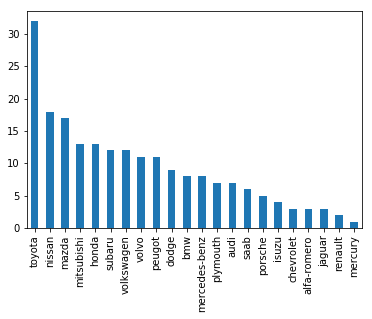

fuel_type


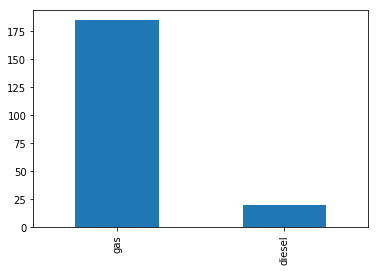

aspiration


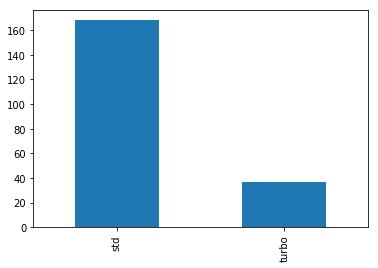

num_of_doors


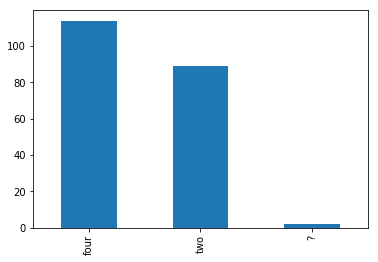

body_style


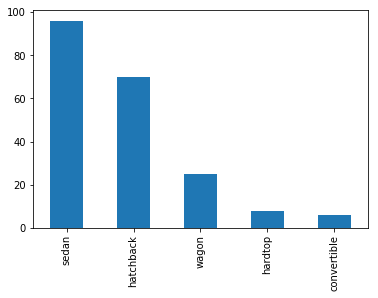

drive_wheels


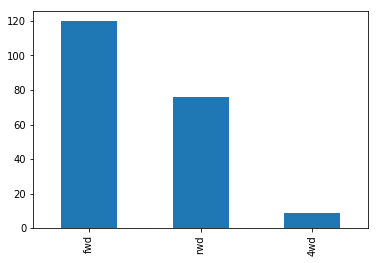

engine_location


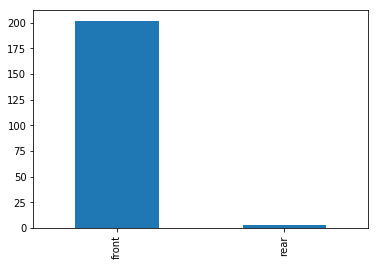

engine_type


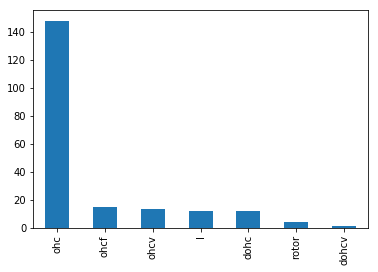

num_of_cylinders


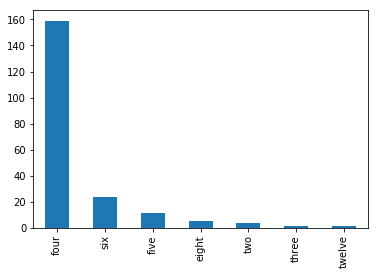

fuel_system


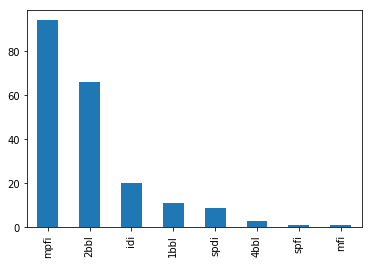

In [4]:
import matplotlib.pyplot as plt
fig = plt.figure()

for x in carsData.select_dtypes(exclude=['float64', 'int']):
    print x
    carsData[x].value_counts().plot(kind='bar')
    plt.show()

From above we can see that most of the times the categorical data is skewed and not equally distributed among all classes

Below function to fill missing values of column by taking dependence on another column to get the most 
appropriate values

#### Note: 
we can use nearest neighbours approach to get a better approximation but I will using the below method for this challenge

In [5]:
def fill_missing(missingColVlaue, dependentColValue, missingColName, dependentColName):
    
    if not math.isnan(carsData.groupby([dependentColName]).mean()[missingColName][dependentColValue]) \
            and math.isnan(missingColVlaue):
        missingColVlaue = carsData.groupby([dependentColName]).mean()[missingColName][dependentColValue]
    elif math.isnan(carsData.groupby([dependentColName]).mean()[missingColName][dependentColValue]) \
            and math.isnan(missingColVlaue):
        missingColVlaue = carsData[missingColName].mean()
    return missingColVlaue


In [6]:
# count and mean using group by to analyze normalized loss
pd.DataFrame({'mean_norm_loss': carsData.groupby('make').mean().normalized_losses,
             'count': carsData.groupby('make').size()}).reset_index()

,make,count,mean_norm_loss
0,alfa-romero,3,NaN
1,audi,7,161.000000
2,bmw,8,190.000000
3,chevrolet,3,100.000000
4,dodge,9,133.444444
5,honda,13,103.000000
6,isuzu,4,NaN
7,jaguar,3,145.000000
8,mazda,17,123.933333
9,mercedes-benz,8,102.800000


#### filling missing normalized loss by looking up for records with similar make values

from the above table it is clear that only 4 makes that are not having any values in the normalized 
losses column. From my observation cars of similar makes have almost the same normalized losses, so by using 
making use of this observation I am filling the missing values for the normalized losses in the data.

#### Note: 
I agree this is not the best thing to do, but for the purpose of this challenge I am proceeding this way as felt this might be need after looking into data and seeing the relationship between car maker and normalized loss


In [7]:
carsData["normalized_losses"] = carsData.apply(lambda x: 
                                    fill_missing(x['normalized_losses'], x['make'],
                                                 "normalized_losses", "make"), axis=1)


In [8]:
print carsData.isnull().any().sum()

5


now since this is pretty small number outoff 205 samples I am dropping these records for the purpose of this 
challenge

A basic model to see how Linear regression works on the entire
Coefficient of determination R^2 is used to check the model efficiency.

#### Note: 
below scoring metric used is mean absoulte error in cross_val_score function which returns a negative value

##### Lazy model

In [9]:
data = carsData.dropna()

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')


X = data.select_dtypes(include=["float64","int"]).drop(["price"], axis=1)
print "features in model", X.columns
y = data.select_dtypes(include=["float64"])["price"]

clf = LinearRegression()
cv_score = cross_val_score(clf, np.asarray(X), np.asarray(y), cv=3, scoring='mean_absolute_error')
print "The means absoulte error: ",-cv_score.mean(), "and its std: ",cv_score.std()

features in model Index([u'symboling', u'normalized_losses', u'wheel_base', u'length', u'width',
       u'height', u'curb_weight', u'engine_size', u'bore', u'stroke',
       u'compression_ratio', u'horsepower', u'peak_rpm', u'city_mpg',
       u'highway_mpg'],
      dtype='object')
The means absoulte error:  3036.08389708 and its std:  492.889785977


### using only continous features and dropping integer features

using general linear regression

In [10]:
X = data.select_dtypes(include=["float64"]).drop(["price"], axis=1)
y = data.select_dtypes(include=["float64"])["price"]

clf = LinearRegression()
cv_score = cross_val_score(clf, np.asarray(X), np.asarray(y), cv=3, scoring='mean_absolute_error')
print "The means absoulte error: ",-cv_score.mean(), "and its std: ",cv_score.std()
cv_score = cross_val_score(clf, np.asarray(X), np.asarray(y), cv=3)
print "R-squared value",cv_score.mean()
print X.columns

The means absoulte error:  3306.08611282 and its std:  510.289423852
R-squared value 0.569049522705
Index([u'normalized_losses', u'wheel_base', u'length', u'width', u'height',
       u'bore', u'stroke', u'compression_ratio', u'horsepower', u'peak_rpm'],
      dtype='object')


###### The model error has increased after dropping integer colums
dropped columns: symboling, crub weight, engine_size, city mpg, highway_mpg

### Few visualizations I might need to refer frequently

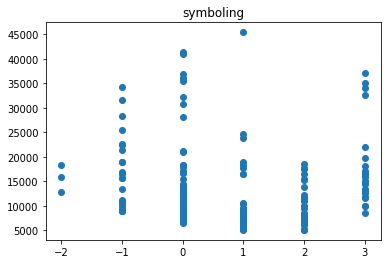

correlation [price, symboling ] = -0.0841176470533


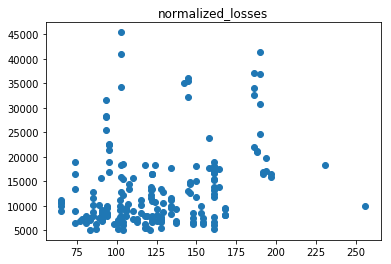

correlation [price, normalized_losses ] = 0.297794839144


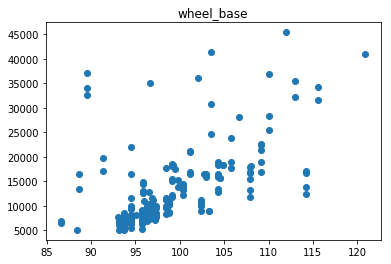

correlation [price, wheel_base ] = 0.585792830392


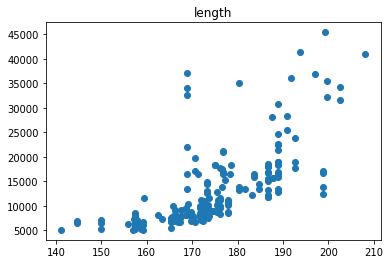

correlation [price, length ] = 0.695330834394


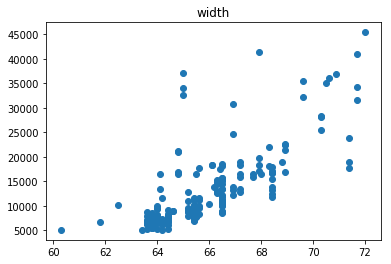

correlation [price, width ] = 0.754273385911


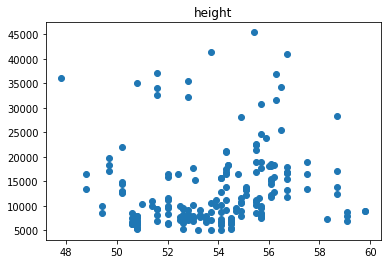

correlation [price, height ] = 0.138290688829


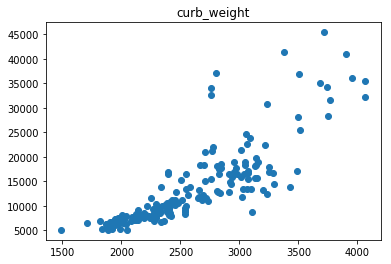

correlation [price, curb_weight ] = 0.83572934151


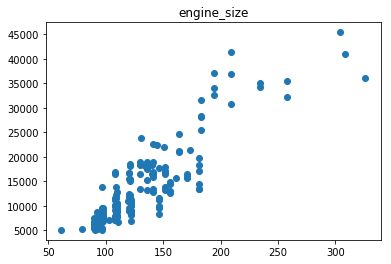

correlation [price, engine_size ] = 0.888942256913


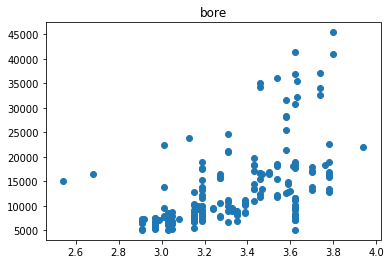

correlation [price, bore ] = 0.546872916687


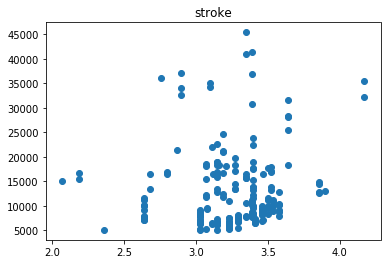

correlation [price, stroke ] = 0.0937464386792


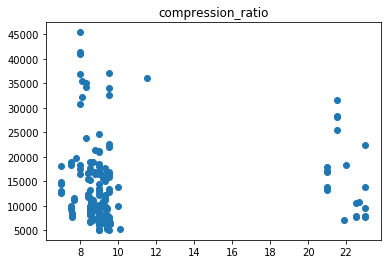

correlation [price, compression_ratio ] = 0.0695002049341


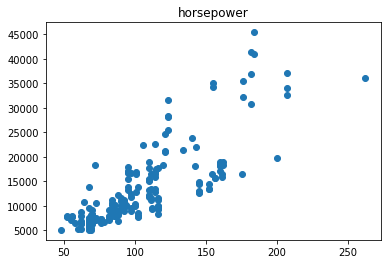

correlation [price, horsepower ] = 0.811026835667


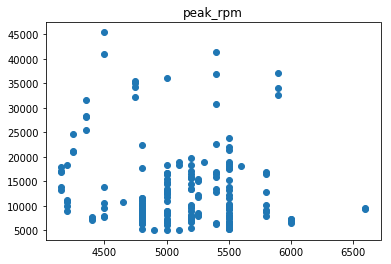

correlation [price, peak_rpm ] = -0.104333395306


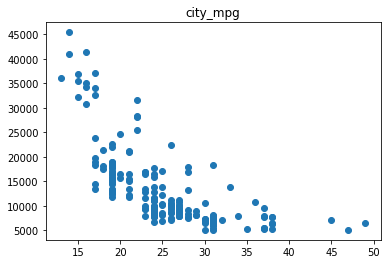

correlation [price, city_mpg ] = -0.702684853994


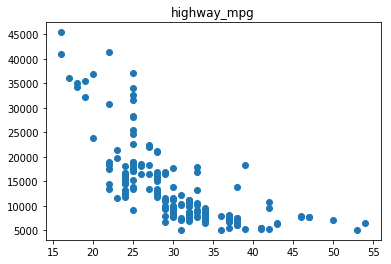

correlation [price, highway_mpg ] = -0.715589758111


In [11]:
# feature generation based on plots against price for the continous variables
X = data.select_dtypes(include=["float64",'int']).drop(["price"], axis=1)
cor_aginst_price = {}
for feature in X.columns:
    fig = plt.figure()
    plt.title(feature)
    plt.scatter(X[feature], y)
    plt.show()
    cor_aginst_price[feature] = np.corrcoef(X[feature], y)[1,0]
    print "correlation [price,",feature,"] =",np.corrcoef(X[feature], y)[1,0]


#### Note: 
even though we tried to estimate the normalized loss it not very useful in the naive model below because of the low correlation

#### Feature engineering to improve model

just trying to include some int feature which miight help improve model by using only the necessary features

In [12]:
X = data.select_dtypes(include=["float64",'int']).drop(["price"], axis=1)
print X.columns
X = X[['engine_size','curb_weight','horsepower','highway_mpg','city_mpg', 'width', 'length', 
       'bore']]
y = data.select_dtypes(include=["float64"])["price"]

clf = LinearRegression()
cv_score = cross_val_score(clf, np.asarray(X), np.asarray(y), cv=3, scoring='mean_absolute_error')
print "The means absoulte error: ",-cv_score.mean(), "and its std: ",cv_score.std()
cv_score = cross_val_score(clf, np.asarray(X), np.asarray(y), cv=3)
print "R-squared value",cv_score.mean()


Index([u'symboling', u'normalized_losses', u'wheel_base', u'length', u'width',
       u'height', u'curb_weight', u'engine_size', u'bore', u'stroke',
       u'compression_ratio', u'horsepower', u'peak_rpm', u'city_mpg',
       u'highway_mpg'],
      dtype='object')
The means absoulte error:  2726.77013833 and its std:  404.601524581
R-squared value 0.68006665111


# Preprocessing data

1. removing unwanted data
    unwanted feature 1: engine location reason: only around 2 cars have back engine --> less important feature

2. filling missing data

3. droping na's

4. One hot encoding using pandas get_dummies   [later it is noticed that this didn't work well and hence pruned]


In [37]:
carsData = read_data()

# filling missing values in normalized loss
carsData[carsData['make'] == 'renault'].normalized_losses = carsData.normalized_losses.mean()
carsData["normalized_losses"] = carsData.apply(lambda 
                                       x:fill_missing(x['normalized_losses'], x['make'],
                                                      "normalized_losses", "make"), axis=1)

def convertor_str_to_num(x):
    convertor = {'one':1,'two':2,'three':3,'four':4,'five':5,'six':6,'seven':7, 'eight':8,
                'nine':9,'ten':10,'eleven':11,'twelve':12}
    return convertor[x]

def convertor_wheel_drive(x):
    convertor = {"rwd":3,"fwd":1,"4wd":2}
    return convertor[x]
    
carsData.num_of_doors[carsData.num_of_doors == "?"] = np.nan

# droping a few columns whose information can be compensated by other features in the data
# altering the features below will help me do feature engineering

carsData.drop(["fuel_system","aspiration","engine_type", "engine_location","fuel_type", "make",
               "body_style",], axis=1, inplace=True)
carsData.dropna(inplace=True)

carsData.num_of_cylinders = carsData.num_of_cylinders.apply(convertor_str_to_num)
carsData.num_of_doors = carsData.num_of_doors.apply(convertor_str_to_num)
carsData.drive_wheels = carsData.drive_wheels.apply(convertor_wheel_drive)

# cars = pd.get_dummies(cars)

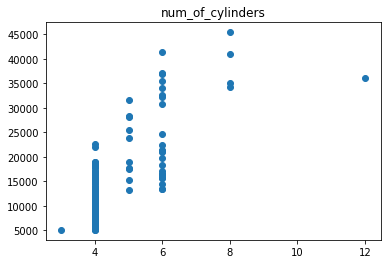

correlation [price, num_of_cylinders ] = 0.746006939554


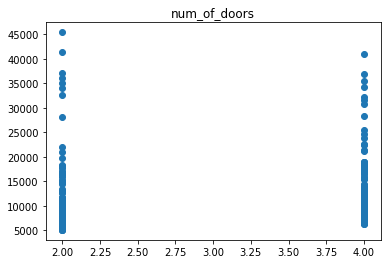

correlation [price, num_of_doors ] = 0.0464604210506


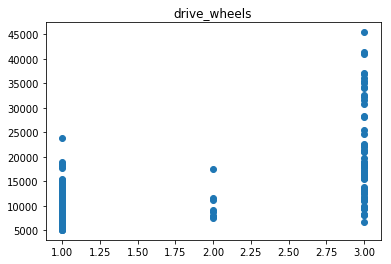

correlation [price, drive_wheels ] = 0.639027784938


In [14]:
# feature generation based on plots against price for the continous variables
X = carsData.select_dtypes(include=["float64",'int']).drop(["price"], axis=1)
y = carsData.price
cor_aginst_price = {}
for feature in ['num_of_cylinders','num_of_doors', 'drive_wheels']:
    fig = plt.figure()
    plt.title(feature)
    plt.scatter(X[feature], y)
    plt.show()
    cor_aginst_price[feature] = np.corrcoef(X[feature], y)[1,0]
    print "correlation [price,",feature,"] =",np.corrcoef(X[feature], y)[1,0]

In [15]:
X = carsData.select_dtypes(include=["float64",'int'])
X = X[['engine_size','curb_weight','horsepower','highway_mpg','city_mpg', 'width',
       'length', 'bore',]]
print X.columns
y = carsData.select_dtypes(include=["float64"])["price"]

clf = LinearRegression()
cv_score = cross_val_score(clf, np.asarray(X), np.asarray(y), cv=3, scoring='mean_absolute_error')
print "The means absoulte error: ",-cv_score.mean(), "and its std: ",cv_score.std()
cv_score = cross_val_score(clf, np.asarray(X), np.asarray(y), cv=3)
print "R-squared value",cv_score.mean()


Index([u'engine_size', u'curb_weight', u'horsepower', u'highway_mpg',
       u'city_mpg', u'width', u'length', u'bore'],
      dtype='object')
The means absoulte error:  2845.59863281 and its std:  356.968767927
R-squared value 0.648177202986


In [16]:
X = carsData.select_dtypes(include=["float64",'int'])
X = X[['engine_size','curb_weight','horsepower','highway_mpg','city_mpg', 'width',
       'length', 'bore','peak_rpm', 'num_of_cylinders']]
print X.columns
y = carsData.select_dtypes(include=["float64"])["price"]

clf = LinearRegression()
cv_score = cross_val_score(clf, np.asarray(X), np.asarray(y), cv=3, scoring='mean_absolute_error')
print "The means absoulte error: ",-cv_score.mean(), "and its std: ",cv_score.std()
cv_score = cross_val_score(clf, np.asarray(X), np.asarray(y), cv=3)
print "R-squared value",cv_score.mean()


Index([u'engine_size', u'curb_weight', u'horsepower', u'highway_mpg',
       u'city_mpg', u'width', u'length', u'bore', u'peak_rpm',
       u'num_of_cylinders'],
      dtype='object')
The means absoulte error:  2858.96349245 and its std:  242.309530119
R-squared value 0.652072417567


including peak_rpm in the model has reduced the deviation in error by approx $100

In [17]:
X = carsData.select_dtypes(include=["float64",'int'])
X = X[['engine_size','curb_weight','horsepower','highway_mpg','city_mpg', 'width',
       'length', 'bore', 'num_of_cylinders','drive_wheels']]
print X.columns
y = carsData.select_dtypes(include=["float64"])["price"]

clf = LinearRegression()
cv_score = cross_val_score(clf, np.asarray(X), np.asarray(y), cv=3, scoring='mean_absolute_error')
print "The means absoulte error: ",-cv_score.mean(), "and its std: ",cv_score.std()
cv_score = cross_val_score(clf, np.asarray(X), np.asarray(y), cv=3)
print "R-squared value",cv_score.mean()


Index([u'engine_size', u'curb_weight', u'horsepower', u'highway_mpg',
       u'city_mpg', u'width', u'length', u'bore', u'num_of_cylinders',
       u'drive_wheels'],
      dtype='object')
The means absoulte error:  3075.56648849 and its std:  150.349925978
R-squared value 0.465123354748


including drive wheels had caused a little increase error but decreased the std of error by $100

In [18]:
X = carsData.select_dtypes(include=["float64",'int'])
X = X[['wheel_base', 'length','width',
       'height', 'curb_weight','engine_size', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg','num_of_cylinders',]]
print X.columns
y = carsData.select_dtypes(include=["float64"])["price"]

clf = LinearRegression()
cv_score = cross_val_score(clf, np.asarray(X), np.asarray(y), cv=3, scoring='mean_absolute_error')
print "The means absoulte error: ",-cv_score.mean(), "and its std: ",cv_score.std()
cv_score = cross_val_score(clf, np.asarray(X), np.asarray(y), cv=3)
print "R-squared value",cv_score.mean()


Index([u'wheel_base', u'length', u'width', u'height', u'curb_weight',
       u'engine_size', u'bore', u'stroke', u'compression_ratio', u'horsepower',
       u'peak_rpm', u'city_mpg', u'highway_mpg', u'num_of_cylinders'],
      dtype='object')
The means absoulte error:  2989.69942614 and its std:  382.80277491
R-squared value 0.645416651085


#### Best Models for now using complete data after filling missing values

In [38]:
X = carsData.select_dtypes(include=["float64",'int'])
X = X[['width','curb_weight','engine_size','horsepower','city_mpg', 'highway_mpg','num_of_cylinders',]]
print X.columns
y = carsData.select_dtypes(include=["float64"])["price"]

clf = LinearRegression()
cv_score = cross_val_score(clf, np.asarray(X), np.asarray(y), cv=3, scoring='mean_absolute_error')
print "The means absoulte error: ",-cv_score.mean(), "and its std: ",cv_score.std()
cv_score = cross_val_score(clf, np.asarray(X), np.asarray(y), cv=3)
print "R-squared value",cv_score.mean()


Index([u'width', u'curb_weight', u'engine_size', u'horsepower', u'city_mpg',
       u'highway_mpg', u'num_of_cylinders'],
      dtype='object')
The means absoulte error:  2711.81463383 and its std:  386.459979018
R-squared value 0.678409953679


#### Best Models for now using complete data after dropping all missing values

In [35]:
carsData = read_data()
carsData.num_of_doors[carsData.num_of_doors == "?"] = np.nan
carsData.dropna(inplace=True)
carsData.num_of_cylinders = carsData.num_of_cylinders.apply(convertor_str_to_num)
carsData.num_of_doors = carsData.num_of_doors.apply(convertor_str_to_num)
carsData.drive_wheels = carsData.drive_wheels.apply(convertor_wheel_drive)


X = carsData.select_dtypes(include=["float64",'int'])
X = X[['width',
       'curb_weight','engine_size',
       'horsepower',  'city_mpg', 'highway_mpg','num_of_cylinders',]]
print X.columns
y = carsData.select_dtypes(include=["float64"])["price"]

clf = LinearRegression()
cv_score = cross_val_score(clf, np.asarray(X), np.asarray(y), cv=3, scoring='mean_absolute_error')
print "The means absoulte error: ",-cv_score.mean(), "and its std: ",cv_score.std()
cv_score = cross_val_score(clf, np.asarray(X), np.asarray(y), cv=3)
print "R-squared value",cv_score.mean()


Index([u'width', u'curb_weight', u'engine_size', u'horsepower', u'city_mpg',
       u'highway_mpg', u'num_of_cylinders'],
      dtype='object')
The means absoulte error:  2020.64019302 and its std:  421.898661859
R-squared value 0.696553367001


## Naive approach with little feature engineering (work in progress)
...

In [19]:
from sklearn.linear_model import Lasso
X = carsData[['horsepower','length', 'width', 'bore']]
y = carsData[['price']]
clf = Lasso()
cv_score = cross_val_score(clf, np.asarray(X), np.asarray(y), cv=3, scoring='mean_absolute_error')
print "The negative means absoulte error: ",-cv_score.mean(), "and its std: ",cv_score.std()

The negative means absoulte error:  3367.86828836 and its std:  251.267898038


The above approach is not bad, but can we still improve?

In [20]:
cars = read_data()
cars["normalized_losses"] = cars.apply(lambda x:
                                       fill_missing(x['normalized_losses'], x['make'],
                                                 "normalized_losses", "make"), axis=1)
cars.dropna(inplace=True)

KeyError: ('make', u'occurred at index 0')

These below plots might help in understanding into how the price varies in each category of  a categorical variable

In [ ]:
%matplotlib inline
plt.rcParams["figure.figsize"] = [15,5]
fig = plt.figure()
cars.boxplot(column='price', by='make', rot=30, showfliers=False)
plt.show()
plt.rcParams["figure.figsize"] = [5,3.5]

In [ ]:
%matplotlib inline
plt.rcParams["figure.figsize"] = [15,5]
fig = plt.figure()
cars.boxplot(column='price', by='symboling', rot=30, showfliers=False)
plt.show()

In [ ]:
%matplotlib inline
plt.rcParams["figure.figsize"] = [15,5]
fig = plt.figure()
cars.boxplot(column='price', by='body_style', rot=30, showfliers=False)
plt.show()

In [ ]:
%matplotlib inline
plt.rcParams["figure.figsize"] = [15,5]
fig = plt.figure()
cars.boxplot(column='price', by='engine_type', rot=30, showfliers=False)
plt.show()

In [ ]:
print cars.horsepower.describe()
cars.horsepower.hist()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
clf = Ridge()
from sklearn.metrics import mean_absolute_error

def linear_regression(X,y):
    clf.fit(X,y)
    w = clf.coef_   # weights
    return w 

train, test = train_test_split(cars[['horsepower','length', 'width', 'bore','price']],
                               test_size=0.3, random_state=3)

hp_cars = train[train.horsepower > 120]
lp_cars = train[train.horsepower <= 120]

hp_X = hp_cars.drop(['price'], axis=1) ; hp_y = hp_cars.price
lp_X = lp_cars.drop(['price'], axis=1) ; lp_y = lp_cars.price

hp_w = linear_regression(hp_X, hp_y)
lp_w = linear_regression(lp_X, lp_y)

hp_X_mean = hp_X.horsepower.mean()
lp_X_mean = lp_X.horsepower.mean()

test["price_prediction"] = pd.Series(np.zeros(len(test)),index=test.index)

def classfiy_and_estimate(x):
    
    diffs = [np.linalg.norm(x.horsepower-hp_X_mean), np.linalg.norm(x-lp_X_mean)]
    # select model based on least diffs
    if diffs.index(max(diffs)) == 1:
        w = lp_w
    elif diffs.index(max(diffs)) == 0:
        w = hp_w
    price_prediction = np.dot(x,w)

    return price_prediction

test['price_prediction'] = test.iloc[:,:-2].apply(classfiy_and_estimate, axis=1)

# print test.price, test.price_prediction

mae = np.sum(np.abs(np.asarray(test['price'])-np.asarray(test['price_prediction'])))/len(test)

print mae

#### classifying into 3 categories and then running linear regression -- needs improvements

Breaking Down approch to use classification and then using linear regression
Putting in 3 models
1. high cost cars
2. moderate cost cars
3. low cost cars
I am using basic domain knowledge for this classification

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
clf = Ridge()
from sklearn.metrics import mean_absolute_error

def linear_regression(X,y):
    clf.fit(X,y)
    w = clf.coef_   # weights
    return w 

train, test = train_test_split(cars[['horsepower','length', 'width', 'bore','price','wheel_base']],
                               test_size=0.3, random_state=3)

hc_cars = train[train.price > 17000]
mc_cars = train[(train.price <= 17000) & (train.price > 10000)]
lc_cars = train[train.price <= 10000]

hc_X = hc_cars.drop(['price'], axis=1) ; hc_y = hc_cars.price
mc_X = mc_cars.drop(['price'], axis=1) ; mc_y = mc_cars.price
lc_X = lc_cars.drop(['price'], axis=1) ; lc_y = lc_cars.price

hc_X = hc_X.apply(lambda x: (x - x.min()) / (x.max() - x.min()))
mc_X = mc_X.apply(lambda x: (x - x.min()) / (x.max() - x.min()))
lc_X = lc_X.apply(lambda x: (x - x.min()) / (x.max() - x.min()))

print hc_X.head()

hc_w = linear_regression(hc_X, hc_y)
mc_w = linear_regression(mc_X, mc_y)
lc_w = linear_regression(lc_X, lc_y)

hc_X_mean = np.asarray(hc_X.mean())
mc_X_mean = np.asarray(mc_X.mean())
lc_X_mean = np.asarray(lc_X.mean())

test["price_prediction"] = pd.Series(np.zeros(len(test)),index=test.index)

def classfiy_and_estimate(x):
    x = np.asarray(x)
    diffs = [np.linalg.norm(x-hc_X_mean), np.linalg.norm(x-mc_X_mean), np.linalg.norm(x-lc_X_mean)]
    # select model based on least diffs
    if diffs.index(max(diffs)) == 2:
        w = lc_w
    elif diffs.index(max(diffs)) == 1:
        w = mc_w
    elif diffs.index(max(diffs)) == 0:
        w = hc_w
    price_prediction = np.dot(x,w)

    return price_prediction

test['price_prediction'] = test.iloc[:,:-2].apply(classfiy_and_estimate, axis=1)

mae = mean_absolute_error(test['price'],test['price_prediction'])

print mae